# Original Dataset

In [1]:
import pandas as pd
import os
import h5py
import numpy as np

pd.set_option("display.max_columns",60)
rootdir = './data/msd/A'
df = pd.DataFrame()
first = True
feature_dict = dict()
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if(len(file) == len('TRAAAAW128F429D538.h5')):
            store = pd.HDFStore(subdir+'/'+file)
            f = h5py.File(subdir+'/'+file, 'r')
            if(first):
                first=False
                # List all groups
                print("Keys: %s" % f.keys())
                a_group_key = list(f.keys())[0]
                b_group_key = list(f.keys())[1]
                c_group_key = list(f.keys())[2]
                group_key = [a_group_key, b_group_key, c_group_key]

                # Get the data
                indices = list(f[a_group_key])+list(f[b_group_key])+list(f[c_group_key])
                indices.remove('songs')
                indices.remove('songs')
                indices.remove('songs')
                print(indices)
                
            df = df.append(pd.concat([store['/analysis/songs'],store['/metadata/songs'],store['/musicbrainz/songs']],axis=1))
            attributes = dict()
            for i in group_key:
                for j in f[i]:
                    if(j!='songs'):
                        attributes[j] = list(f[i][j])
            feature_dict[store['/analysis/songs'].get_value(0,'track_id')] = attributes

df = df.reindex_axis(sorted(df.columns), axis=1).set_index('track_id')



Keys: KeysView(<HDF5 file "TRAAAAW128F429D538.h5" (mode r)>)
['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'tatums_confidence', 'tatums_start', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'similar_artists', 'artist_mbtags', 'artist_mbtags_count']


analysis sample rate | float | sample rate of the audio used : DROP

artist 7digitalid | int | ID from 7digital.com or -1 : DROP

artist familiarity | float | algorithmic estimation	: KEEP, between 0 and 1

artist hotttnesss | float | algorithmic estimation : KEEP, between 0 and 1 but some values greater than 1

artist id | string | Echo Nest ID : KEEP

artist latitude | float | latitude : KEEP

artist location | string | location name : KEEP

artist longitude | float | longitude : KEEP	

artist mbid | string | ID from musicbrainz.org : DROP

artist mbtags | array string | tags from musicbrainz.org : KEEP

artist mbtags count | array int | tag counts for musicbrainz tags : KEEP

artist name | string | artist name : KEEP

artist playmeid | int | ID from playme.com, or -1 : DROP

artist terms | array string | Echo Nest tags : KEEP

artist terms freq | array float | Echo Nest tags freqs : KEEP

artist terms weight | array float | Echo Nest tags weight : KEEP

audio md5 | string | audio hash code : DROP

bars confidence | array float | confidence measure : DROP ?

bars start | array float | beginning of bars, usually on a beat	: DROP ?

beats confidence | array float | confidence measure	: DROP ? 

beats start | array float | result of beat tracking	: DROP ?

danceability | float | algorithmic estimation : KEEP ?

duration | float | in seconds : KEEP

end of fade in | float | seconds at the beginning of the song : DROP ?

energy | float | energy from listener point of view : KEEP

key | int | key the song is in : KEEP between 0 and 11

key confidence | float | confidence measure	: DROP ?

loudness | float | overall loudness in dB : KEEP relative mesure (negative)

mode | int | major or minor : KEEP between 0 and 1

mode confidence | float | confidence measure : DROP ?

release | string | album name : KEEP

release 7digitalid | int | ID from 7digital.com or -1 : DROP

sections confidence | array float | confidence measure : DROP

sections start | array float | largest grouping in a song, e.g. verse : DROP

segments confidence | array float | confidence measure : DROP

segments loudness max | array float | max dB value : DROP

segments loudness max time | array float | time of max dB value, i.e. end of attack : DROP

segments loudness max start | array float | dB value at onset : DROP

segments pitches | 2D array float | chroma feature, one value per note : DROP

segments start | array float | musical events, ~ note onsets : DROP

segments timbre | 2D array float | texture features (MFCC+PCA-like) : DROP

similar artists | array string | Echo Nest artist IDs (sim. algo. unpublished) : KEEP

song hotttnesss | float | algorithmic estimation : KEEP	lot of NaN

song id | string | Echo Nest song ID : KEEP used in Taste profile subset

start of fade out | float | time in sec	url : DROP

tatums confidence | array float | confidence measure : DROP

tatums start | array float | smallest rythmic element : DROP

tempo | float | estimated tempo in BPM : KEEP

time signature | int | estimate of number of beats per bar, e.g. 4 : DROP

time signature confidence | float | confidence measure : DROP

title | string | song title : KEEP

track id | string | Echo Nest track ID : KEEP	

track 7digitalid | int | ID from 7digital.com or -1 : DROP

year | int | song release year from MusicBrainz or 0 : KEEP	lots of NaN

We can also drop useless indices in the dataframe that correspond to arrays and the 'genre' value which is supposed to be a string is not appearing in the field list.

In [90]:
pd.set_option("display.max_rows",600)
df.sort_values('artist_familiarity',ascending=False)

analysis_sample_rate analyzer_version  artist_7digitalid  \
track_id                                                                       
TRAARHS128F931689D                 22050                                 616   
TRAAQCK128F92E8C33                 22050                               24981   
TRAANTZ128E0792529                 22050                                7338   
TRAAGEC128E079252C                 22050                                7338   
TRAAPVV128F425D64C                 22050                               17428   
TRAASQC128F93480F0                 22050                                6795   
TRAAEWG128F930B3A4                 22050                                1246   
TRAAGCZ128F93210FD                 22050                               15260   
TRAATMY128F149562F                 22050                                 106   
TRAAYPN128F9340DDF                 22050                               16551   
TRAACER128F4290F96                 22050                               82239   
TRAAKDF128F92FA302                 22050                                8293   
TRAAKDG128F42A0ECB                 22050                               21239   
TRAAKAS128F4246013                 22050                                4549   
TRAATNJ128F42631BA                 22050                               14530   
TRAASUZ128F9314950                 22050                               14530   
TRAAPFQ128F42684DB                 22050                               18460   
TRAASGM128EF34DBB0                 22050                               49956   
TRAADLN128F14832E9                 22050                                 522   
TRAAMES128F42AF068                 22050                                1244   
TRAADDS128F425C68B                 22050                               16860   
TRAAVIT128F92E657C                 22050                               11846   
TRAAUEO128E0780CB9                 22050                                  23   
TRAAVOU128F422F292                 22050                               21128   
TRAAAPK128E0786D96                 22050                               21128   
TRAAGPJ128F428CD1B                 22050                                5845   
TRAACVS128E078BE39                 22050                                9222   
TRAAIYR12903CD290D                 22050                                7487   
TRAAIHL128F92E6DDA                 22050                                1566   
TRAAWGY128F4298A09                 22050                              128188   
TRAAMKL128F9347D8A                 22050                                 618   
TRAANLO128F422AE37                 22050                                8580   
TRAASKQ128F4265E04                 22050                               52369   
TRAATIU128F4291A84                 22050                               29785   
TRAAMFT128F93128AD                 22050                               29785   
TRAAFJW128F428A424                 22050                               33328   
TRAABJV128F1460C49                 22050                                 237   
TRAAPIV128F1493132                 22050                                1380   
TRAAEMJ128F425A917                 22050                                3041   
TRAAENP128F147BF32                 22050                               10249   
TRAASKO128F427CE1C                 22050                              260652   
TRAAFYL128E07856A7                 22050                                4741   
TRAAHEG128E07861C3                 22050                                 368   
TRAAGKS128F9314884                 22050                                8614   
TRAALCM128F4264370                 22050                               40884   
TRAASZE128F93499AE                 22050                               21632   
TRAARRG12903CDB456                 22050                              266506   
TRAADNA128F9331246                 22050                               48814   
TRAAJMH128E0785407  

In [2]:
print(indices)
print()
track = 'TRAADLN128F14832E9'
print(feature_dict[track]['similar_artists'])
print()
for artist in feature_dict[track]['similar_artists']:
    try :
        print(df['artist_name'][track]+' is similar to '+df['artist_name'][df.index[df['artist_id']==artist.decode("utf-8")][0]])
    except :
        pass

['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'tatums_confidence', 'tatums_start', 'artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'similar_artists', 'artist_mbtags', 'artist_mbtags_count']

[b'ARSAIUN1187FB398D3', b'ARC73361187B9B42BD', b'ARDIBRT1187B9AF176', b'ARIO65L1187FB4D25F', b'AROCBZZ11E2835D652', b'ARBZ6CQ1187FB3CBE6', b'ARAPIIU1187B98FAC9', b'AR8SRQ31187FB4D477', b'ARCOBLE1187B9A2446', b'AREMCBW12454A2E9CB', b'AROJ4691187FB3EC1C', b'ARUKN9H1187B9B71C8', b'ARLIBVA1187B99074B', b'ARFWLXM1187B9B5EE5', b'ARLAUED1187B9ACEAF', b'ARP6N5A1187B99D1A3', b'AR5FP401187FB523C9', b'ARXIFJD124549A3AF1', b'ARCCTQI1187B98E46D', b'ARX18ET1187FB4D179', b'ARPISA41187FB3DE42', b'ARQUR4L1187B9AF6BC', b'AR2I0S21187FB50D90', b'ARZGU111187B9A5E10', b'ARS1OWB1187B99EE

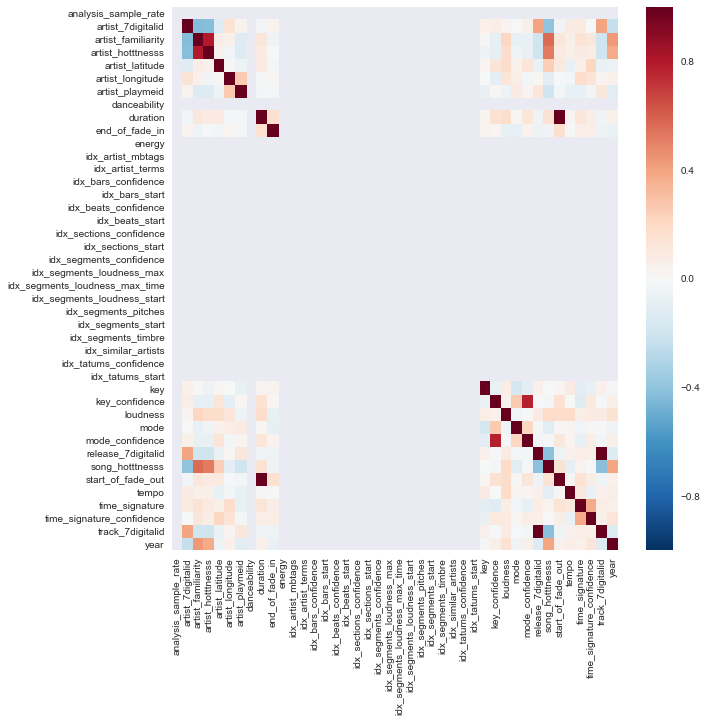

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax = ax)
plt.show()

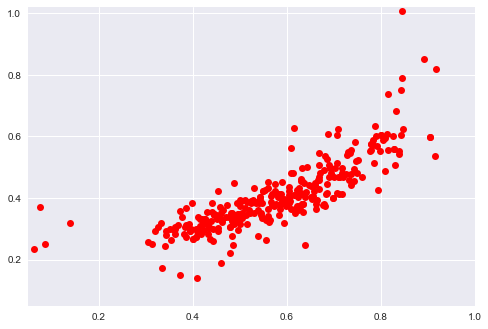

In [46]:
plt.plot(list(df['artist_familiarity']),list(df['artist_hotttnesss']),'ro')
plt.ylim([0.05,1.02])
plt.xlim([0.05,1])
plt.show()

# SecondHand Dataset

In [65]:
from pprint import pprint

with open('./data/shs_dataset_train.txt', encoding='utf-8') as f:
    content = f.readlines()
content = [x.strip() for x in content]
content[14]
second_hand = dict()
for i in range(14,len(content)):
    if(content[i][0] == '%'):
        content[i]=content[i].split(sep = ',')
        title = content[i][len(content[i])-1]
        covers = list()
        i+=1
        while(i< len(content) and content[i][0] != '%') :
            content[i]=content[i].split(sep = '<SEP>')
            cover = {
                    'track_id': content[i][0],
                    'artist_id': content[i][1],
                    'shs_perf': content[i][2]
            }
            covers.append(cover)
            i+=1
        second_hand[title] = covers
        
pprint(second_hand)

{" '39 (Swingin' Utters)": [{'artist_id': 'AROBOIW11F4C84748F',
                             'shs_perf': '114364',
                             'track_id': 'TRAROST128F421F2A7'},
                            {'artist_id': 'ARL4TII1187B9B46E1',
                             'shs_perf': '660',
                             'track_id': 'TRINIFH128F147CEAA'}],
 " 'O Sole Mio ( Live )": [{'artist_id': 'AR36MOL1187B988D72',
                            'shs_perf': '112442',
                            'track_id': 'TRLTMAN128E079674E'},
                           {'artist_id': 'ARGP3GD1187B999801',
                            'shs_perf': '27580',
                            'track_id': 'TRGYIXB128F428D9B0'},
                           {'artist_id': 'ARULZ741187B9AD2EF',
                            'shs_perf': '27581',
                            'track_id': 'TRHVLQV128F4289642'},
                           {'artist_id': 'ARL7YU61187B9B85D7',
                            'shs_perf': '117342',
     

I don't think keeping the shs performance is useful as well as the work ids from shs website.

# MusicXMatch Dataset

In [68]:
with open('./data/mxm_dataset_test.txt', encoding='utf-8') as f:
    content = f.readlines()
content = [x.strip() for x in content]
word_idx = content[17].split(sep = ',')

lyrics= dict()
for i in range(18,len(content)):
    content[i]=content[i].split(sep = ',')
    words = dict()
    for j in range(2,len(content[i])):
        line = content[i][j].split(sep=':')
        words[line[0]]=line[1]
    lyrics[content[i][0]] = words  
    
for a in lyrics:
    pprint(lyrics[a])
    break

{'1': '13',
 '10': '3',
 '113': '6',
 '1153': '1',
 '119': '1',
 '12': '5',
 '129': '1',
 '13': '3',
 '1308': '4',
 '131': '7',
 '132': '1',
 '137': '18',
 '14': '5',
 '1455': '2',
 '1457': '1',
 '1482': '2',
 '15': '2',
 '1582': '1',
 '159': '1',
 '1732': '1',
 '1761': '1',
 '18': '7',
 '186': '1',
 '188': '2',
 '1889': '1',
 '2': '3',
 '20': '7',
 '220': '1',
 '233': '3',
 '235': '1',
 '248': '1',
 '25': '1',
 '26': '5',
 '260': '1',
 '268': '1',
 '28': '2',
 '2819': '1',
 '285': '2',
 '29': '2',
 '3': '26',
 '30': '1',
 '307': '4',
 '31': '5',
 '32': '1',
 '33': '2',
 '3459': '1',
 '3646': '2',
 '37': '2',
 '4': '15',
 '41': '1',
 '419': '1',
 '44': '1',
 '444': '1',
 '48': '1',
 '49': '2',
 '5': '7',
 '50': '5',
 '51': '4',
 '513': '1',
 '52': '2',
 '56': '4',
 '562': '1',
 '571': '1',
 '6': '4',
 '65': '2',
 '68': '1',
 '7': '9',
 '70': '2',
 '755': '2',
 '8': '16',
 '82': '4',
 '84': '3',
 '855': '2',
 '86': '1',
 '9': '5',
 '93': '1',
 '98': '1'}


In [98]:
for t in lyrics:
    try:
        print(df['title'][t]+" by "+df['artist_name'][t]+"\n")
        print()
        for word in lyrics[t]:
            print(repr(word_idx[int(word)]+" : "+repr(lyrics[t][word])))
        print()    
    except:
        pass

Hoochie Coochie Man by The Jeff Healey Band


"in : '1'"
"wanna : '1'"
"save : '5'"
"kann : '1'"
"echo : '1'"
"line : '1'"
"no : '1'"
"me : '4'"
"to : '9'"
"first : '1'"
"drink : '1'"
"remain : '1'"
"live : '4'"
"ship : '2'"
"heard : '1'"
"wind : '1'"
"the : '19'"
"do : '1'"
"possibl : '1'"
"neck : '1'"
"see : '2'"
"for : '1'"
"freak : '1'"
"then : '1'"
"everyth : '1'"
"die : '6'"
"was : '1'"
"somebodi : '2'"
"corazon : '1'"
"mind : '7'"
"this : '10'"
"de : '1'"
"are : '3'"
"your : '1'"
"vide : '1'"
"her : '1'"
"flow : '1'"
"é : '1'"
"all : '1'"
"have : '1'"
"if : '1'"
"with : '3'"
"nos : '1'"
"on : '1'"
"find : '1'"
"capit : '3'"
"is : '2'"
"a : '7'"
"never : '5'"
"pare : '1'"
"paura : '1'"
"will : '14'"
"noth : '1'"
"take : '2'"
"about : '1'"
"you : '8'"
"it : '2'"
"spent : '1'"
"summer : '1'"
"sail : '1'"
"how : '9'"
"su : '1'"
"feel : '2'"
"rip : '1'"
"led : '1'"
"some : '1'"
"just : '1'"
"away : '1'"
"at : '1'"
"more : '2'"
"você : '2'"
"way : '2'"
"what : '2'"
"but : '1'"
"blind 

# LastFM Dataset

In [112]:
import json
from pprint import pprint

lastfm_dir = './data/lastfm/A'
data = dict()
for subdir, dirs, files in os.walk(lastfm_dir):
    for file in files:
        track = json.load(open(subdir+'/'+file))
        data[track['track_id']] = track
        break
    
pprint(data)

{'TRAAAAW128F429D538': {'artist': 'Casual',
                        'similars': [['TRABACN128F425B784', 0.871737],
                                     ['TRIAINV12903CB4943', 0.751301],
                                     ['TRJYGLF12903CB4952', 0.751052],
                                     ['TRVNXHF128F93134F0', 0.582662],
                                     ['TRWJMMB128F429D550', 0.508661],
                                     ['TRUEULA128F425B7DB', 0.404535],
                                     ['TRIEUIZ128F427973B', 0.028357],
                                     ['TRWNLAW128F9364539', 0.0278891],
                                     ['TRWIMTU128F148D424', 0.0227976],
                                     ['TRPTKMG128F930E997', 0.0198059],
                                     ['TRQIPME12903CE0A48', 0.0161872],
                                     ['TRAOGGC128F4215EB5', 0.0158649],
                                     ['TROIDMT128F428ED1F', 0.0158644],
                           

Dict consisting of track_id linked to artist name, similar songs with similarity mesure, list of tags with integer of unknown purpose (weight ?), timestamp that can be dropped, title and track_id can be dropped.

# Taste Profile Dataset

(Didn't found a subset)
We can see that it uses the song ids as indices whereas all other subsets use the track ids which might cause some problems.